In [104]:
## import necessary libraries ##

import os
import shutil
import random
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing import image
from collections import Counter

In [10]:
## def necessary functions ##

def readFiles(dir_):
    file_list = os.listdir(dir_)
    Files = list()
    for entry in file_list:
        path = os.path.join(dir_, entry)
        if os.path.isdir(path):
            Files = Files + readFiles(path)
        else:
            Files.append(path)  
    return Files


In [19]:
# read bengin cell images
files_benign = readFiles('BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign')

if not os.path.exists("augmented/benign"):
    os.makedirs("augmented/benign")

for f in files_benign:
    if f.endswith('.png'):
        shutil.copy(f, 'augmented/benign')

# read malignant cell images
files_malignant=readFiles('BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant')

if not os.path.exists("augmented/malignant"):
    os.makedirs("augmented/malignant")

for f in files_malignant:
    if f.endswith('.png'):
        shutil.copy(f, 'augmented/malignant')

In [20]:
# 温和细胞
benign = readFiles('augmented/benign')

# 恶化细胞
malignent = readFiles('augmented/malignant')

In [85]:
# Total num of images
total = len(benign)+len(malignent)
print(f"Dataset includes totally {total} images")

Dataset includes totally 7909 images


In [68]:
sample_benign = []
indexes_benign = []
for i in range(4):
    index = random.randint(0, len(benign))
    indexes_benign.append(index)
    sample_benign.append(image.load_img(benign[index], target_size=(120,120,1), grayscale=False))
    
sample_malignent = []
indexes_malignent = []
for i in range(4):
    index = random.randint(0, len(malignent))
    indexes_malignent.append(index)
    sample_malignent.append(image.load_img(malignent[index], target_size=(120,120,1), grayscale=False))

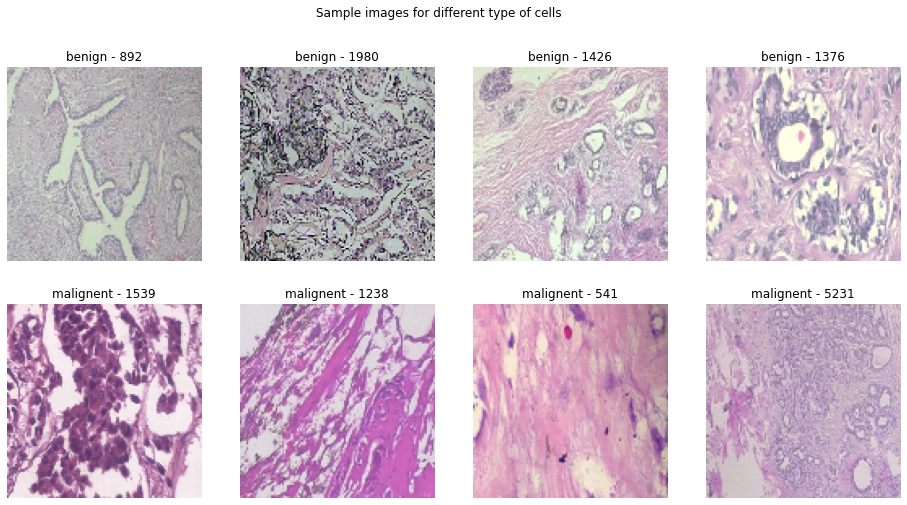

In [83]:
# Sample shows

plt.figure(figsize = (16, 8))

plt.subplot(2, 4, 1)
plt.axis("off")
plt.imshow(sample_benign[0])
plt.title("benign - {}".format(indexes_benign[0]))

plt.subplot(2, 4, 2)
plt.axis("off")
plt.imshow(sample_benign[1])
plt.title("benign - {}".format(indexes_benign[1]))

plt.subplot(2, 4, 3)
plt.axis("off")
plt.imshow(sample_benign[2])
plt.title("benign - {}".format(indexes_benign[2]))

plt.subplot(2, 4, 4)
plt.axis("off")
plt.imshow(sample_benign[3])
plt.title("benign - {}".format(indexes_benign[3]))

plt.subplot(2, 4, 5)
plt.axis("off")
plt.imshow(sample_malignent[0])
plt.title("malignent - {}".format(indexes_malignent[0]))

plt.subplot(2, 4, 6)
plt.axis("off")
plt.imshow(sample_malignent[1])
plt.title("malignent - {}".format(indexes_malignent[1]))

plt.subplot(2, 4, 7)
plt.axis("off")
plt.imshow(sample_malignent[2])
plt.title("malignent - {}".format(indexes_malignent[2]))

plt.subplot(2, 4, 8)
plt.axis("off")
plt.imshow(sample_malignent[3])
plt.title("malignent - {}".format(indexes_malignent[3]))

plt.suptitle("Sample images for different type of cells")
plt.show()

In [111]:
 # Statistic for different types

data = pd.DataFrame(index=np.arange(0, len(benign)+len(malignent)), columns=["image", "type"])
counter = 0
for i in range(len(benign)):
    data.iloc[counter]["image"] = benign[i]
    data.iloc[counter]["type"] = "benign"
    counter += 1

for i in range(len(malignent)):
    data.iloc[counter]["image"] = malignent[i]
    data.iloc[counter]["type"] = "malignent"
    counter += 1

# first five samples
print("The shape of data is {} * {}.".format(data.shape[0], data.shape[1]))
data.head()

The shape of data is 7909 * 2.


,image,type
0,augmented/benign\SOB_B_A-14-22549AB-100-001.png,benign
1,augmented/benign\SOB_B_A-14-22549AB-100-002.png,benign
2,augmented/benign\SOB_B_A-14-22549AB-100-003.png,benign
3,augmented/benign\SOB_B_A-14-22549AB-100-004.png,benign
4,augmented/benign\SOB_B_A-14-22549AB-100-005.png,benign


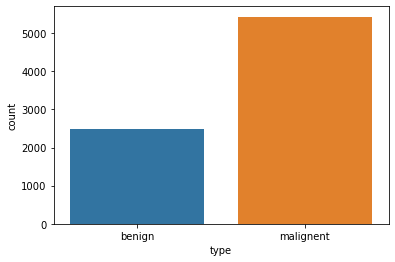

In [112]:
# visualize the number of types 
target=sns.countplot(x = data['type'])
target.set_xticklabels(['benign', 'malignent' ])
plt.show()

# from this graph, we can see that, this dataset is a class imbalance dataset.